# Analysis of Baby Names in the US
This data comes from the US SSA Department
https://www.ssa.gov/oact/babynames/limits.html
They also have more detailed data which lists name frequency by year, sex, and state or territory!

In this notebook, we will show how to read in this data and plot the frequencies of each name over the years.
The dataset contains the actual counts of each name but we can easiy convert that into probabilities...

First we will import all of the packages we'll need, then we'll read the data into a list of dictionaries.

In [16]:
import sys
!{sys.executable} -m pip install matplotlib

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

In [5]:
import csv
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt


# Read in the data
Next we read in the data using the csv.DictReader function

This will give us a list of dictionaries and we'll print the length of this list
and also the first and last five dictionaries in the list.

In [6]:
babyfile = open("baby100.csv","r",encoding="utf-8")
data = list(csv.DictReader(babyfile,delimiter=','))
babyfile.close()
print('we have read in',len(data),"names")
data[:5]+data[-5:]

we have read in 28000 names


[{'year': '1880',
  'name': 'Mary',
  'sex': 'F',
  'count': '7065',
  'percent': '0.035064819042703144',
  'rank': '1'},
 {'year': '1880',
  'name': 'Anna',
  'sex': 'F',
  'count': '2604',
  'percent': '0.012924103154592921',
  'rank': '2'},
 {'year': '1880',
  'name': 'Emma',
  'sex': 'F',
  'count': '2003',
  'percent': '0.009941236028667288',
  'rank': '3'},
 {'year': '1880',
  'name': 'Elizabeth',
  'sex': 'F',
  'count': '1939',
  'percent': '0.009623592940382363',
  'rank': '4'},
 {'year': '1880',
  'name': 'Minnie',
  'sex': 'F',
  'count': '1746',
  'percent': '0.008665700502273133',
  'rank': '5'},
 {'year': '2019',
  'name': 'Evan',
  'sex': 'M',
  'count': '3942',
  'percent': '0.0011441604425248039',
  'rank': '96'},
 {'year': '2019',
  'name': 'Kayden',
  'sex': 'M',
  'count': '3887',
  'percent': '0.0011281967630882579',
  'rank': '97'},
 {'year': '2019',
  'name': 'Parker',
  'sex': 'M',
  'count': '3878',
  'percent': '0.001125584524635005',
  'rank': '98'},
 {'year'

In [7]:
print([d['year'] for d in data if d['name']=='Ryan'])

['1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


# Cleaning the data
Notice that the year, count, percent, and rank are all strings
We need to convert them to numbers to be able to plot them.
So let's loop through the data and do those conversions

In [8]:
for d in data:
    d['year']=int(d['year'])
    d['count'] = int(d['count'])
    d['percent'] = float(d['percent'])
    d['rank']=int(d['rank'])
data[-1]

{'year': 2019,
 'name': 'Kai',
 'sex': 'M',
 'count': 3718,
 'percent': 0.0010791447299105077,
 'rank': 100}

# Plotting the data
Let's plot the data now

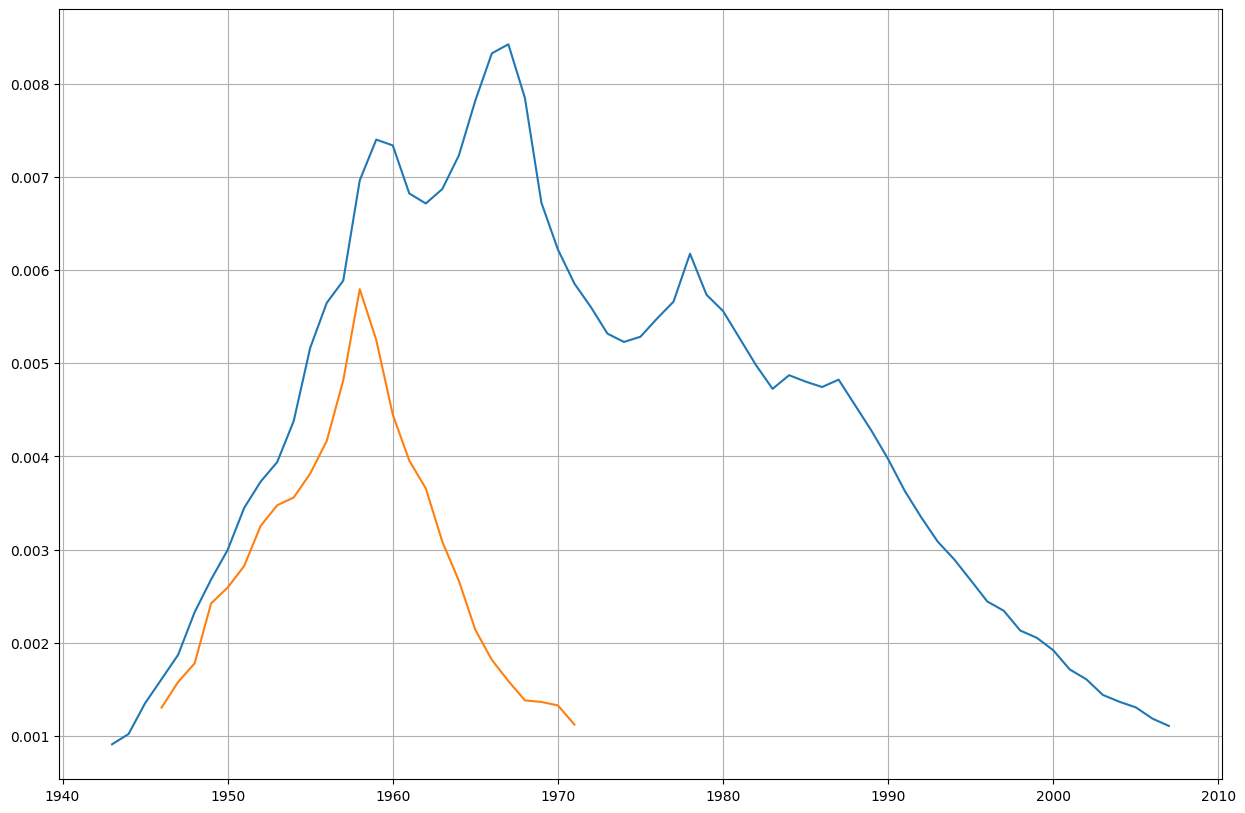

In [14]:
def plot_percent(name,sex):
    babies = [d for d in data if d['name']==name and d['sex']==sex]
    xs = [d['year'] for d in babies]
    ys = [d['percent'] for d in babies]
    plt.plot(xs,ys,label="name"+"/"+sex)

plt.rcParams["figure.figsize"] = (15,10)
plot_percent("Timothy","M")
plot_percent("Kathy","F")
plt.grid()


# plotting different fields in the data
Here we define a funciton with a default parameter specifying the field we plot on!

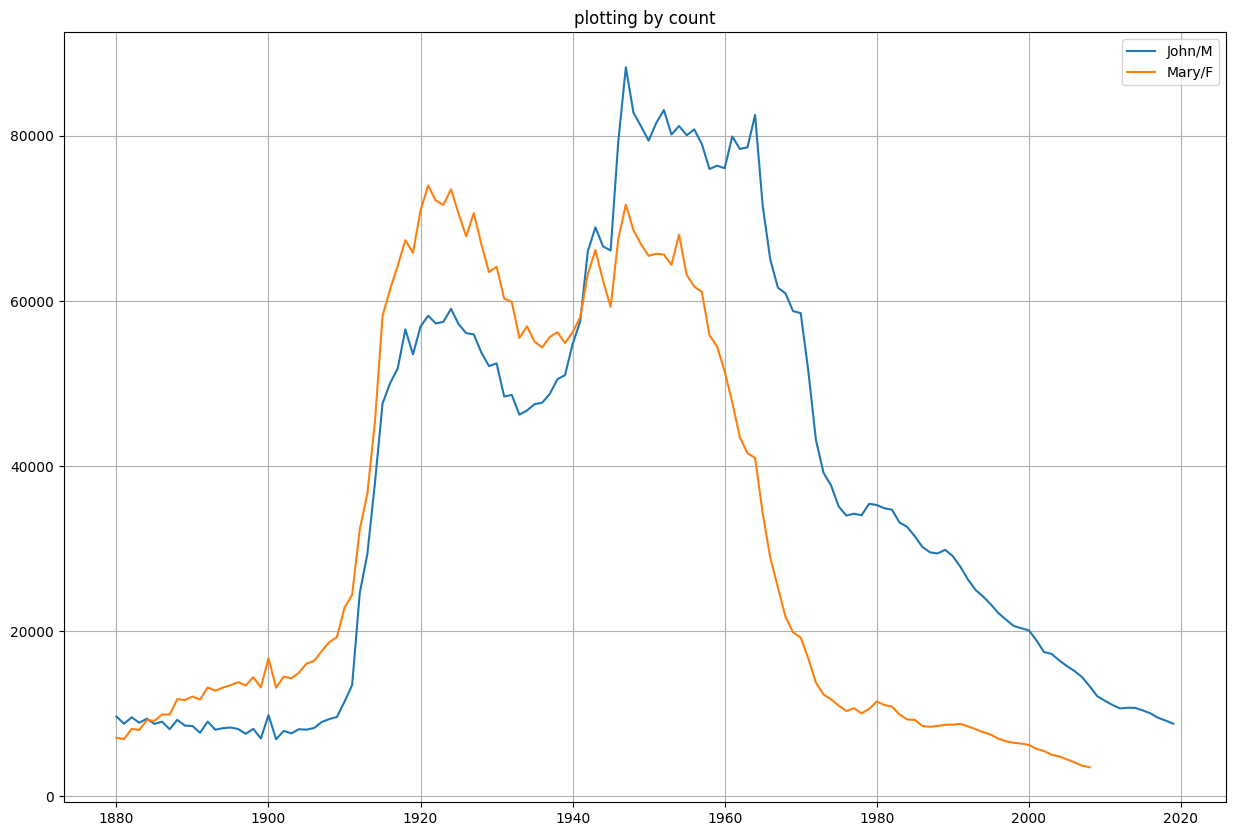

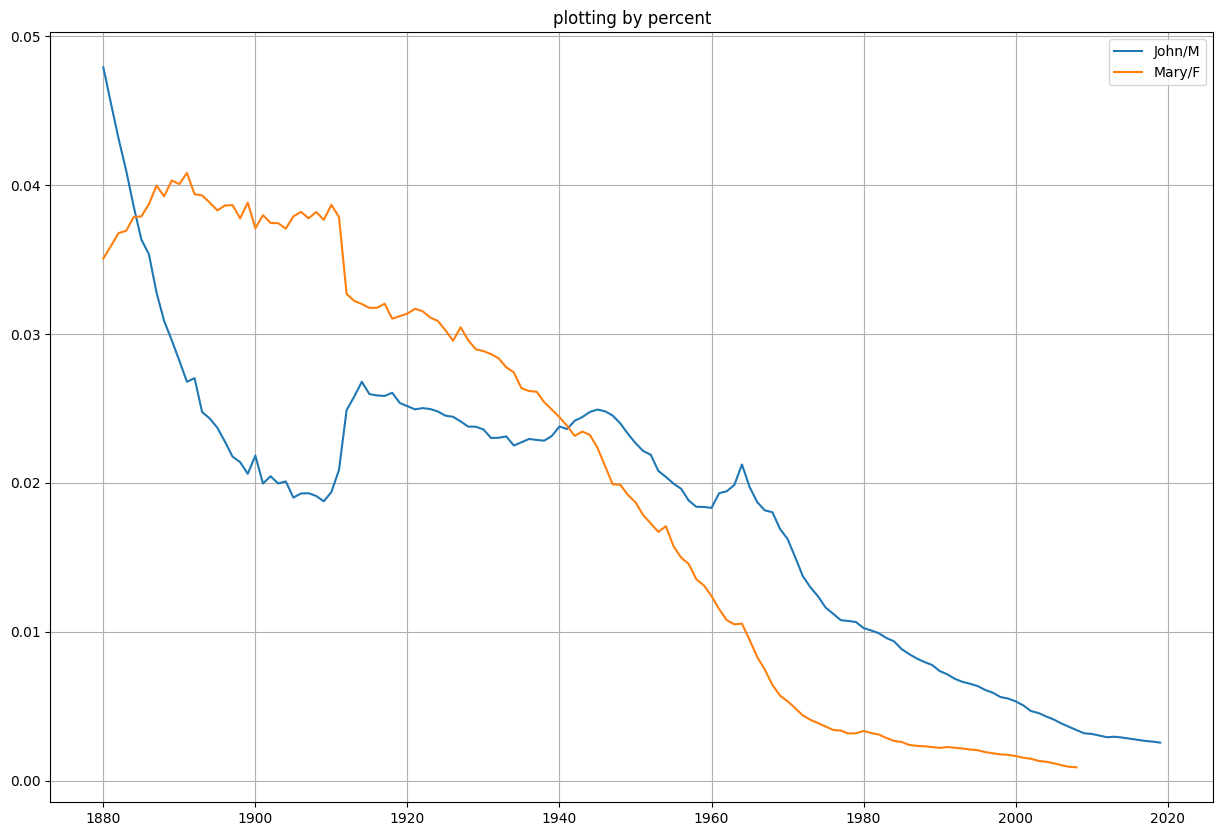

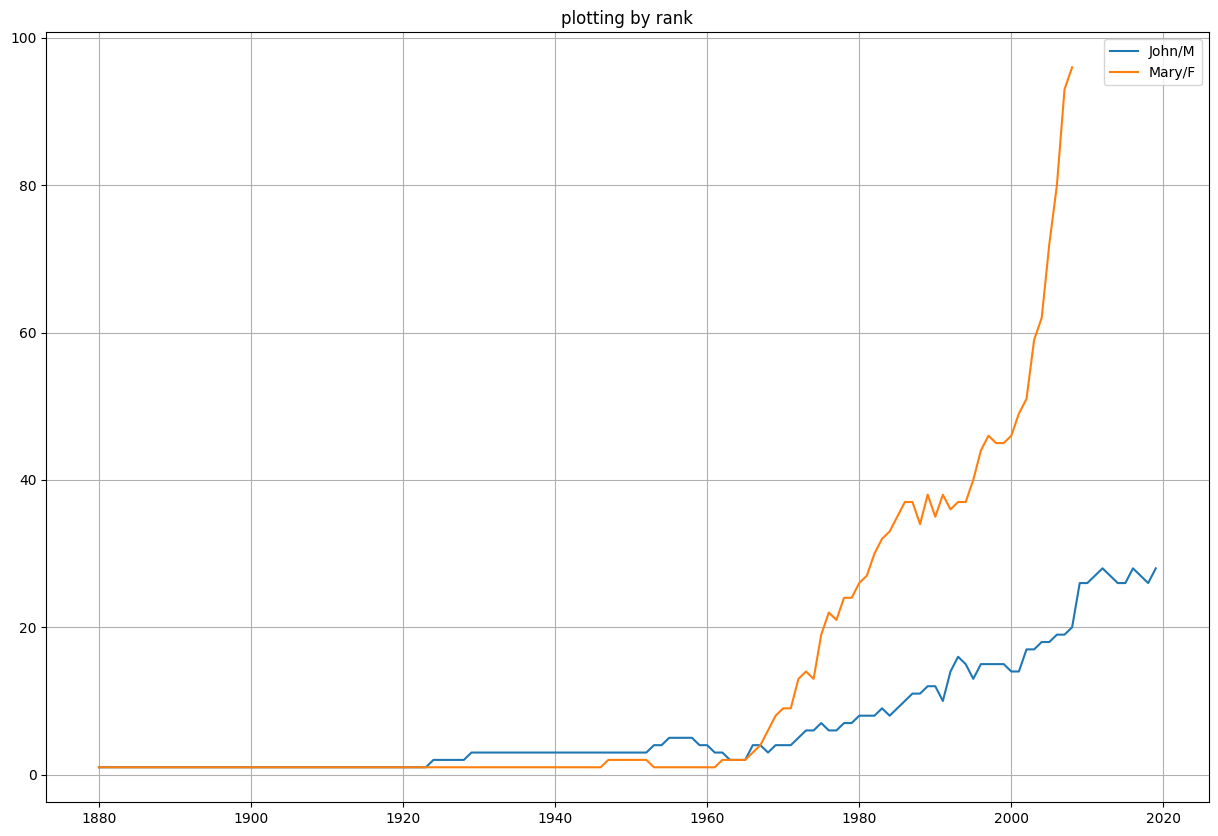

In [22]:
def plotbaby(name,sex,field="percent"):
    babies = [d for d in data if d['name']==name and d['sex']==sex]
    xs = [d['year'] for d in babies]
    ys = [d[field] for d in babies]
    plt.plot(xs,ys,label=name+"/"+sex)



plt.rcParams["figure.figsize"] = (15,10)
plotbaby("John","M",field="count")
plotbaby("Mary","F",field="count")
plt.title("plotting by count")
plt.grid()
plt.legend()

plt.figure()
plotbaby("John","M")
plotbaby("Mary","F")
plt.title("plotting by percent")
plt.grid()
plt.legend()

plt.figure()
plotbaby("John","M",field="rank")
plotbaby("Mary","F",field="rank")
plt.title("plotting by rank")
plt.grid()
plt.legend()

# How many distinct names are in our data set?

In [11]:
names = {d['name'] for d in data}
print(len(names))

848


# Most Popular names
Lets sort the data by the count field and find which year had the most babies with the same name
We could also sort by percent to see which names were the most popular ever, in a relative sense.

In [12]:
mostpop = sorted(data,key=lambda x: x['count'],reverse=True)
for d in mostpop[:20]:
    print(d)

{'year': 1947, 'name': 'Linda', 'sex': 'F', 'count': 99690, 'percent': 0.027675092361352478, 'rank': 1}
{'year': 1948, 'name': 'Linda', 'sex': 'F', 'count': 96213, 'percent': 0.027868608863627083, 'rank': 1}
{'year': 1947, 'name': 'James', 'sex': 'M', 'count': 94766, 'percent': 0.026308133240203924, 'rank': 1}
{'year': 1957, 'name': 'Michael', 'sex': 'M', 'count': 92726, 'percent': 0.022071922389554695, 'rank': 1}
{'year': 1947, 'name': 'Robert', 'sex': 'M', 'count': 91645, 'percent': 0.025441707688395505, 'rank': 2}
{'year': 1949, 'name': 'Linda', 'sex': 'F', 'count': 91019, 'percent': 0.026119818450631795, 'rank': 1}
{'year': 1956, 'name': 'Michael', 'sex': 'M', 'count': 90662, 'percent': 0.021994134541649776, 'rank': 1}
{'year': 1958, 'name': 'Michael', 'sex': 'M', 'count': 90531, 'percent': 0.021910641004417416, 'rank': 1}
{'year': 1948, 'name': 'James', 'sex': 'M', 'count': 88587, 'percent': 0.025659697269621903, 'rank': 1}
{'year': 1954, 'name': 'Michael', 'sex': 'M', 'count': 88